In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('Titanic-Dataset.csv',index_col=['PassengerId'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [13]:
df.drop(columns=['Cabin'],inplace=True)

In [14]:
df['Embarked']=df['Embarked'].fillna('S')

In [15]:
df['Fare']=df.groupby(['Pclass'])['Fare'].transform(lambda x: x.replace(0,x.median()))

In [16]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

In [17]:
df['Family_Size']=df['SibSp']+df['Parch']+1

In [18]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
)

In [19]:
df_survived=df[df['Survived']==1]['Survived']
df_died=df[df['Survived']==0]['Survived']

num_of_survived=len(df_survived)
num_of_died=len(df_died)
print(num_of_survived,num_of_died)

342 549


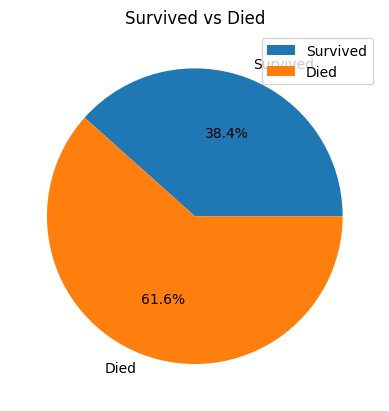

In [20]:
plt.pie([num_of_survived,num_of_died],labels=['Survived','Died'],autopct='%1.1f%%')
plt.title('Survived vs Died')
plt.legend()
plt.show()

109 233


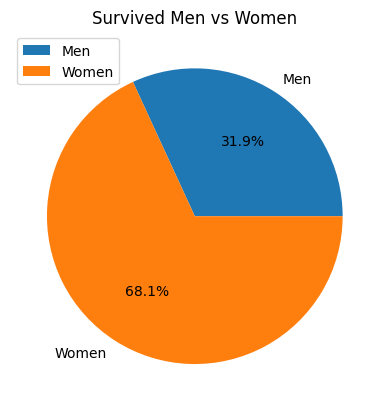

In [22]:
df_men_Survived=df[(df['Sex']==1)&(df['Survived']==1)]['Name']
df_women_Survived=df[(df['Sex']==0)&(df['Survived']==1)]['Name']
print(len(df_men_Survived),len(df_women_Survived))

plt.pie([len(df_men_Survived),len(df_women_Survived)],labels=['Men','Women'],autopct='%1.1f%%')
plt.title('Survived Men vs Women')
plt.legend()
plt.show()

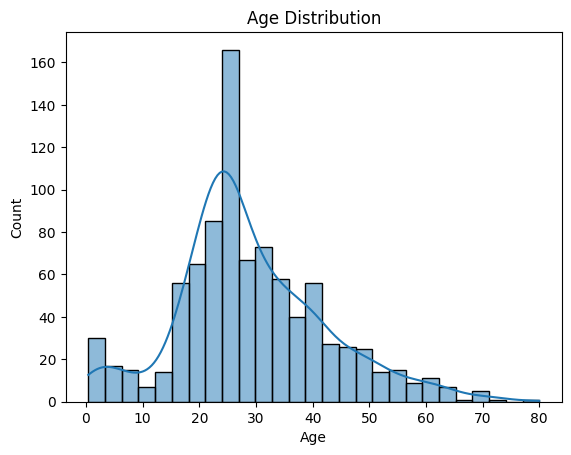

In [23]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

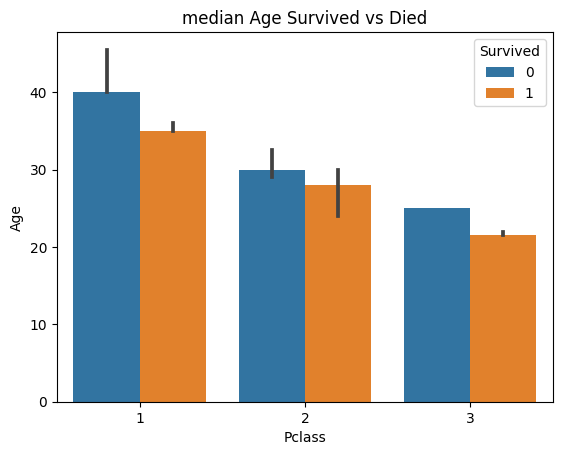

In [24]:
sns.barplot(data=df,x='Pclass',y='Age',hue='Survived',estimator='median')
plt.title('median Age Survived vs Died')
plt.show()

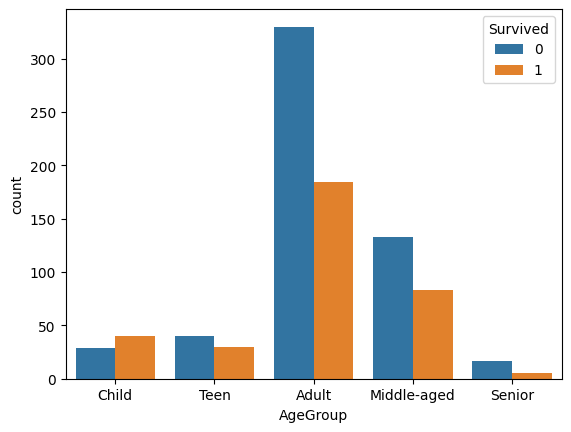

In [25]:
sns.countplot(data=df,x='AgeGroup',hue='Survived')
plt.show()

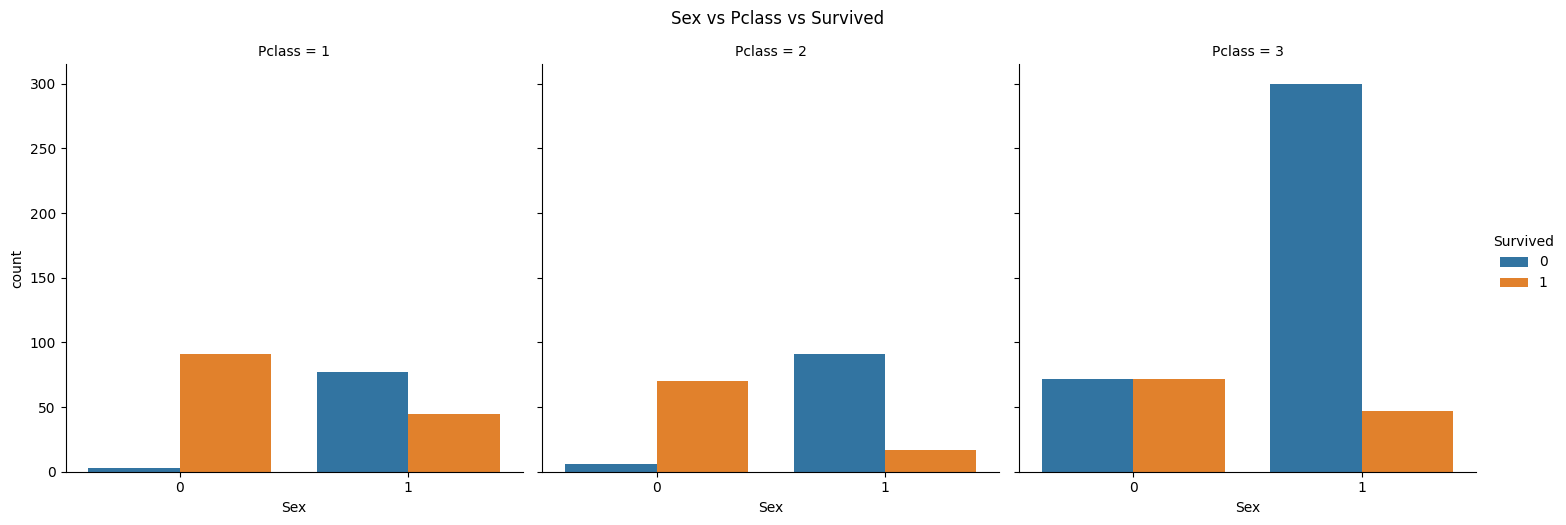

In [26]:
g=sns.catplot(data=df,x='Sex',col='Pclass',hue='Survived',kind='count')
g.fig.suptitle('Sex vs Pclass vs Survived',y=1.04)
plt.show()

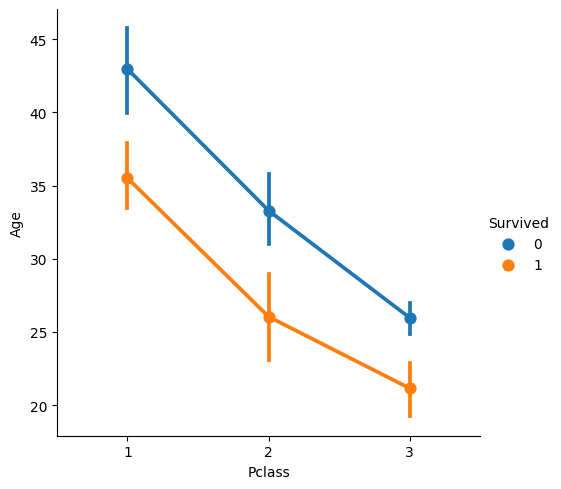

In [27]:
sns.catplot(data=df,x='Pclass',y='Age',kind='point',hue='Survived')
plt.show()